In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import os
import cv2
import pickle
from tqdm import tqdm

In [7]:
# load and resizing the images
categories=['negative','positive']
MyDs=[]
for category in categories:
    if category=='negative':
        label=0
    else:
        label=1
    Path=os.path.join('D:\\datasets\\watermark detector\\dataset\\train',category)
    for pic_name in os.listdir(Path):
        try:
            image=cv2.imread(os.path.join(Path,pic_name))
            resized = cv2.resize(image, (130, 130))
        except:
            pass
        MyDs.append([resized,label])


In [3]:
# rescaling
for i in range(len(MyDs)):
    MyDs[i][0]=MyDs[i][0]/255
    
# shuffling
shuffle(MyDs)

In [4]:
# pickle_out=open('MyDs.pkl','wb')
# pickle.dump(MyDs,pickle_out)
# pickle_out.close()

pickle_in=open('MyDs.pkl','rb')
MyDs=pickle.load(pickle_in)

In [5]:
X_MyDs=[]
Y_MyDs=[]
for x,y in MyDs:
    X_MyDs.append(x)
    Y_MyDs.append(y)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X_MyDs,Y_MyDs,test_size=0.21,random_state=42,shuffle=True)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.18,random_state=42)
x_train=np.array(x_train)
x_test=np.array(x_test)
x_val=np.array(x_val)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)

In [13]:
model=tf.keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(6,6),activation='relu',input_shape=(200,200,3),kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    # keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    # keras.layers.MaxPool2D(pool_size=(2)),
    # keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    # keras.layers.MaxPool2D(pool_size=(2)),
    # keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_constraint=keras.constraints.max_norm(0.3)),
    # keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding='same',kernel_constraint=keras.constraints.max_norm(0.3)),
    # keras.layers.MaxPool2D(pool_size=(2)),
    keras.layers.Flatten(),
    # keras.layers.Dense(256,activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    # keras.layers.Dropout(rate=0.5),
    # keras.layers.Dense(64,activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    # keras.layers.Dropout(rate=0.5),
    # keras.layers.Dense(16,activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    # keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
CallBack=keras.callbacks.EarlyStopping(patience=10,mode='val_loss',restore_best_weights=True)
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 301088)            0         
                                                                 
 dense_6 (Dense)             (None, 1)                 301089    
                                                                 
Total params: 304,577
Trainable params: 304,577
Non-trainable params: 0
_________________________________________________________________


In [111]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),validation_batch_size=20,batch_size=20,epochs=45,callbacks=[CallBack])

Epoch 1/45
278/278 [==============================] - 8s 25ms/step - loss: 0.6934 - accuracy: 0.5101 - val_loss: 0.6930 - val_accuracy: 0.5201
Epoch 2/45
278/278 [==============================] - 6s 22ms/step - loss: 0.6933 - accuracy: 0.5065 - val_loss: 0.6932 - val_accuracy: 0.4799
Epoch 3/45
278/278 [==============================] - 6s 23ms/step - loss: 0.6931 - accuracy: 0.5065 - val_loss: 0.6933 - val_accuracy: 0.4799
Epoch 4/45
278/278 [==============================] - 6s 23ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6931 - val_accuracy: 0.4873
Epoch 5/45
278/278 [==============================] - 6s 23ms/step - loss: 0.6929 - accuracy: 0.5094 - val_loss: 0.6932 - val_accuracy: 0.4832
Epoch 6/45
278/278 [==============================] - 7s 24ms/step - loss: 0.6923 - accuracy: 0.5236 - val_loss: 0.6908 - val_accuracy: 0.5692
Epoch 7/45
278/278 [==============================] - 7s 25ms/step - loss: 0.6889 - accuracy: 0.5479 - val_loss: 0.6883 - val_accuracy: 0.5594

<Axes: >

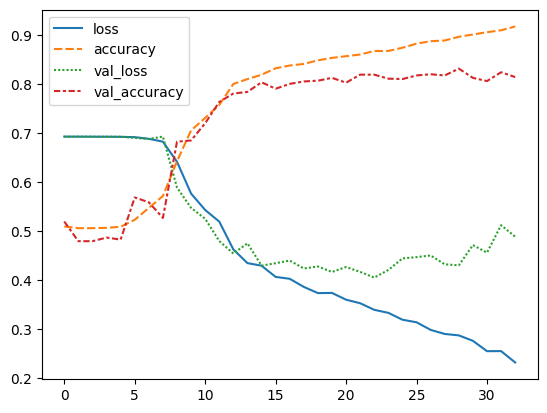

In [112]:
sns.lineplot(history.history)

In [113]:
predictions=model.predict(x_test)

57/57 [==============================] - 1s 12ms/step


In [114]:
r2=r2_score(y_test,predictions)
Adj_r2= 1-(1-r2)*(5242-1)/(5242-100-1)
print(f'r2={r2}  ///  adj_r2={Adj_r2}')

r2=0.5213701642738648  ///  adj_r2=0.5120601110599738


In [115]:
mse=mean_squared_error(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
rmse=np.sqrt(mse)
print(f'rmse={rmse}  ///  mse={mse}  ///  mae={mae}')

rmse=0.3458425480930763  ///  mse=0.11960706807151178  ///  mae=0.25373548850121674


In [116]:
predictions_2=np.where(predictions>=0.5,1,0)

print(f'f1_score:{f1_score(y_test,predictions_2)}','\n')
print('confusion maxtrix:')
print(confusion_matrix(y_test,predictions_2),'\n')
print(f'accuracy_score:{accuracy_score(y_test,predictions_2)}')

f1_score:0.8397976391231029 

confusion maxtrix:
[[771 112]
 [173 747]] 

accuracy_score:0.8419301164725458


In [117]:
model.save('model.h5')

# w=keras.models.load_model('model.h5')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,mean_squared_error,r2_score,mean_absolute_error
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import os
import cv2
# import pickle
from tqdm import tqdm

In [2]:
model=tf.keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(6,6),activation='relu',input_shape=(200,200,3),kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.MaxPool2D(pool_size=(2)),
    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.MaxPool2D(pool_size=(2)),
    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding='same',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.MaxPool2D(pool_size=(2)),
    keras.layers.Conv2D(384,kernel_size=(3,3),activation='relu',padding='same',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.MaxPool2D(pool_size=(2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(64,activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(16,activation='relu',kernel_constraint=keras.constraints.max_norm(0.3)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
CallBack=keras.callbacks.EarlyStopping(patience=10,mode='val_loss',restore_best_weights=True)
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

In [3]:
def get_len(the_path):
    length=0
    categories=os.listdir(the_path)
    for category in categories:
        Path=os.path.join(the_path,category)
        length=length+len(os.listdir(Path))
    return length

In [4]:
# load and resizing the images
def get_image_big_batch(Batch,Big_Batch_size,the_path,Batch_size,Random_state):
    Start=Big_Batch_size*(Batch//((Big_Batch_size*2)//Batch_size))
    categories=os.listdir(the_path)
    MyDataSet=[]
    for category in categories:
        label=categories.index(category)
        Path=os.path.join(the_path,category)
        if len(os.listdir(Path))>Start+Big_Batch_size:
            for pic_name in os.listdir(Path)[Start:Start+Big_Batch_size]:
                MyDataSet.append((os.path.join(Path,pic_name),label))
        else:
            for pic_name in os.listdir(Path)[Start:]:
                MyDataSet.append((os.path.join(Path,pic_name),label))
    shuffled_MyDataSet=shuffle(MyDataSet,random_state=Random_state)
    return shuffled_MyDataSet


In [5]:
def get_batch_from_big_batch(batch,batch_size,the_big_batch,pic_size):
    Start=batch_size*(batch%(len(the_big_batch)//batch_size))
    mini_X_MyDataSet=[]
    mini_Y_MyDataSet=[]
    for path,Y in the_big_batch[Start:Start+batch_size]:
        try:
            image=cv2.imread(path)/255
            resized = cv2.resize(image, (pic_size, pic_size))
        except:
            pass
        mini_X_MyDataSet.append(resized)
        mini_Y_MyDataSet.append(Y)
    return mini_X_MyDataSet,mini_Y_MyDataSet

In [10]:
def train_on_batch(the_path,batch_size,Big_Batch_size,n_epoch,val_num_in_batch,pic_size,seed=42):
    loss_history=[]
    acc_history=[]
    val_loss_history=[]
    val_acc_history=[]
    for epoch in range(n_epoch):
        # val_xds.clear()
        # val_yds.clear()
        val_xds=[]
        val_yds=[]
        for batch in tqdm(range(get_len(the_path)//batch_size)):
            if batch%(((Big_Batch_size*2)//batch_size))==0:
                access='granted'
            else:
                access='not granted'
            if access=='granted':
                Big_Batch=get_image_big_batch(batch,Big_Batch_size,the_path,batch_size,Random_state=seed)
            batch_x,batch_y=get_batch_from_big_batch(batch,batch_size,Big_Batch,pic_size)
            for val_element in batch_x[-val_num_in_batch:]:
                val_xds.append(val_element)
            for val_element in batch_y[-val_num_in_batch:]:
                val_yds.append(val_element)
            loss,acc=model.train_on_batch(np.array(batch_x[:batch_size-val_num_in_batch]),np.array(batch_y[:batch_size-val_num_in_batch]))
            # val_loss,val_acc=model.test_on_batch(np.array(batch_x[-val_num_in_batch:]),np.array(batch_y[-val_num_in_batch:]))
        loss_history.append(loss)
        acc_history.append(acc)
        val_loss,val_acc=model.evaluate(np.array(val_xds),np.array(val_yds))
        del val_xds[:]
        del val_xds
        del val_yds[:]
        del val_yds
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)
        print('Epoch: %d ,     Train Loss %.4f,    Train Acc. %.4f,    Val Loss %.4f,    Val Acc. %.4f' %
			(epoch+1, loss, acc, val_loss, val_acc))
    return {'loss_history':loss_history,'acc_history':acc_history,'val_loss_history':val_loss_history,'val_acc_history':val_acc_history}

In [11]:
path='D:\\datasets\\watermark detector\\dataset\\train'
history=train_on_batch(path,batch_size=40,Big_Batch_size=200,n_epoch=25,val_num_in_batch=8,pic_size=200)

  0%|          | 0/214 [00:00<?, ?it/s]

 11%|█         | 24/214 [00:13<01:40,  1.89it/s]

 14%|█▎        | 29/214 [00:16<01:34,  1.95it/s]

<Axes: >

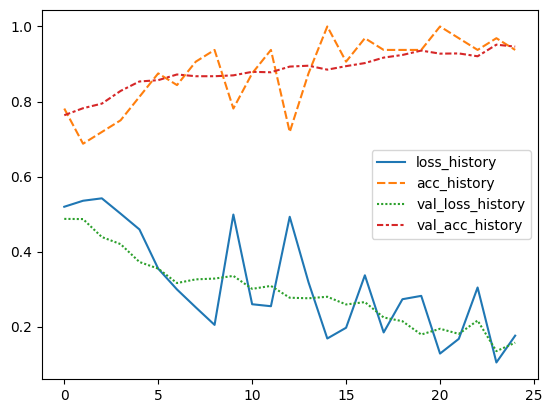

In [10]:
sns.lineplot(history)

In [9]:
# Train Loss 0.1759,    Train Acc. 0.9375,    Val Loss 0.1572,    Val Acc. 0.9463
# model.save('model.h5')

model=keras.models.load_model('model.h5')

In [7]:
Big_Batch=get_image_big_batch(1,2500,path,2500)
x,y=get_batch_from_big_batch(1,2500,Big_Batch)

In [10]:
model.evaluate(np.array(x),np.array(y))

79/79 [==============================] - 1s 12ms/step - loss: 0.1410 - accuracy: 0.9508


[0.1410139799118042, 0.9508000016212463]